In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
IGS_data = pd.read_excel('IGS_mer', sheet_name = 'Compared to Urban-Rural', header = 1)
IGS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   N/A                                  749 non-null    float64
 1   Census Tract FIPS code               749 non-null    float64
 2   County                               749 non-null    object 
 3   State                                749 non-null    object 
 4   Year                                 749 non-null    float64
 5   Inclusive Growth Score               742 non-null    float64
 6   Residential Real Estate Value Score  674 non-null    float64
 7   Affordable Housing Score             733 non-null    float64
 8   Personal Income Score                742 non-null    float64
dtypes: float64(7), object(2)
memory usage: 52.9+ KB


In [3]:
IGS_data.head(10)

,N/A,Census Tract FIPS code,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,5.174021e+10,Portsmouth city,Virginia,2017.0,40.0,56.0,12.0,74.0
2,1.0,5.174021e+10,Portsmouth city,Virginia,2018.0,38.0,54.0,12.0,71.0
3,2.0,5.174021e+10,Portsmouth city,Virginia,2019.0,51.0,46.0,8.0,58.0
4,3.0,5.174021e+10,Portsmouth city,Virginia,2020.0,44.0,60.0,4.0,44.0
5,4.0,5.174021e+10,Portsmouth city,Virginia,2021.0,46.0,50.0,5.0,37.0
6,5.0,5.174021e+10,Portsmouth city,Virginia,2022.0,41.0,32.0,2.0,38.0
7,6.0,5.174021e+10,Portsmouth city,Virginia,2023.0,40.0,34.0,2.0,40.0
8,7.0,5.171000e+10,Norfolk city,Virginia,2017.0,40.0,12.0,40.0,64.0
9,8.0,5.171000e+10,Norfolk city,Virginia,2018.0,40.0,11.0,48.0,54.0


In [4]:
IGS_data = IGS_data.drop(0) # dropped first row
IGS_data = IGS_data.drop('N/A', axis = 1) # removed first column
IGS_data.head(10)

,Census Tract FIPS code,County,State,Year,Inclusive Growth Score,Residential Real Estate Value Score,Affordable Housing Score,Personal Income Score
1,5.174021e+10,Portsmouth city,Virginia,2017.0,40.0,56.0,12.0,74.0
2,5.174021e+10,Portsmouth city,Virginia,2018.0,38.0,54.0,12.0,71.0
3,5.174021e+10,Portsmouth city,Virginia,2019.0,51.0,46.0,8.0,58.0
4,5.174021e+10,Portsmouth city,Virginia,2020.0,44.0,60.0,4.0,44.0
5,5.174021e+10,Portsmouth city,Virginia,2021.0,46.0,50.0,5.0,37.0
6,5.174021e+10,Portsmouth city,Virginia,2022.0,41.0,32.0,2.0,38.0
7,5.174021e+10,Portsmouth city,Virginia,2023.0,40.0,34.0,2.0,40.0
8,5.171000e+10,Norfolk city,Virginia,2017.0,40.0,12.0,40.0,64.0
9,5.171000e+10,Norfolk city,Virginia,2018.0,40.0,11.0,48.0,54.0
10,5.171000e+10,Norfolk city,Virginia,2019.0,44.0,18.0,48.0,48.0


In [5]:
Mental_Health_Data = pd.read_csv('/Users/cerser5/Downloads/PLACES__Local_Data_for_Better_Health__County_Data.csv')

/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_15084/3904749080.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Mental_Health_Data = pd.read_csv('/Users/cerser5/Downloads/PLACES__Local_Data_for_Better_Health__County_Data.csv')


In [6]:
Mental_Health_Data.head(5)

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2022,US,United States,NaN,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Crude prevalence,12.0,...,11.8,12.2,333287557,260836730,59,HLTHOUT,DIABETES,CrdPrv,Diabetes,NaN
1,2022,AL,Alabama,Barbour,BRFSS,Disability,Hearing disability among adults,%,Crude prevalence,9.6,...,8.5,10.7,24706,19675,1005,DISABLT,HEARING,CrdPrv,Hearing Disability,POINT (-85.3928136383141 31.8698172860413)
2,2022,AL,Alabama,Calhoun,BRFSS,Health Outcomes,Stroke among adults,%,Age-adjusted prevalence,3.7,...,3.4,4.0,115788,91336,1015,HLTHOUT,STROKE,AgeAdjPrv,Stroke,POINT (-85.8257674379293 33.7714931264898)
3,2022,AL,Alabama,Chambers,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,5.6,...,5.1,6.0,34088,27025,1017,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-85.3917577489906 32.9141677822456)
4,2022,AL,Alabama,Clay,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,5.3,...,4.9,5.7,14198,11235,1027,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-85.8606604130173 33.2693085517833)


In [8]:
# Filtering Norfolk and Portsmouth Data
Va_data = Mental_Health_Data.loc[(Mental_Health_Data['StateAbbr'] == 'VA') & (Mental_Health_Data['LocationName'].isin(['Norfolk', 'Portsmouth']))]
Va_data.head(5)

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
215698,2022,VA,Virginia,Norfolk,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Age-adjusted prevalence,13.9,...,12.4,15.5,232995,186236,51710,HLTHOUT,DIABETES,AgeAdjPrv,Diabetes,POINT (-76.2594956953889 36.8946370439568)
215835,2022,VA,Virginia,Portsmouth,BRFSS,Health Outcomes,Current asthma among adults,%,Crude prevalence,11.3,...,10.0,12.8,97029,74842,51740,HLTHOUT,CASTHMA,CrdPrv,Current Asthma,POINT (-76.3542600357069 36.846673287269)
216065,2022,VA,Virginia,Norfolk,BRFSS,Disability,Vision disability among adults,%,Age-adjusted prevalence,6.0,...,5.5,6.5,232995,186236,51710,DISABLT,VISION,AgeAdjPrv,Vision Disability,POINT (-76.2594956953889 36.8946370439568)
216137,2022,VA,Virginia,Norfolk,BRFSS,Prevention,Current lack of health insurance among adults ...,%,Age-adjusted prevalence,8.9,...,7.9,10.1,232995,186236,51710,PREVENT,ACCESS2,AgeAdjPrv,Health Insurance,POINT (-76.2594956953889 36.8946370439568)
216311,2022,VA,Virginia,Norfolk,BRFSS,Health Outcomes,Cancer (non-skin) or melanoma among adults,%,Age-adjusted prevalence,6.4,...,5.8,7.0,232995,186236,51710,HLTHOUT,CANCER,AgeAdjPrv,Cancer (non-skin) or Melanoma,POINT (-76.2594956953889 36.8946370439568)


In [16]:
Va_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 215698 to 233461
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        132 non-null    int64  
 1   StateAbbr                   132 non-null    object 
 2   StateDesc                   132 non-null    object 
 3   LocationName                132 non-null    object 
 4   DataSource                  132 non-null    object 
 5   Category                    132 non-null    object 
 6   Measure                     132 non-null    object 
 7   Data_Value_Unit             132 non-null    object 
 8   Data_Value_Type             132 non-null    object 
 9   Data_Value                  132 non-null    float64
 10  Data_Value_Footnote_Symbol  0 non-null      object 
 11  Data_Value_Footnote         0 non-null      object 
 12  Low_Confidence_Limit        132 non-null    float64
 13  High_Confidence_Limit      

In [12]:
healthissues = Mental_Health_Data['Measure'].unique()
print(healthissues)

['Diagnosed diabetes among adults' 'Hearing disability among adults'
 'Stroke among adults' 'Short sleep duration among adults'
 'Cancer (non-skin) or melanoma among adults'
 'Frequent physical distress among adults'
 'Current lack of health insurance among adults aged 18-64 years'
 'Current asthma among adults' 'Arthritis among adults'
 'Cognitive disability among adults' 'Mobility disability among adults'
 'Any disability among adults' 'Depression among adults'
 'Obesity among adults' 'Binge drinking among adults'
 'Visits to doctor for routine checkup within the past year among adults'
 'Coronary heart disease among adults'
 'Feeling socially isolated among adults'
 'Chronic obstructive pulmonary disease among adults'
 'High blood pressure among adults' 'Self-care disability among adults'
 'Mammography use among women aged 50-74 years'
 'Vision disability among adults' 'Cholesterol screening among adults'
 'All teeth lost among adults aged >=65 years'
 'Independent living disability

In [14]:
print(IGS_data.describe())


       Census Tract FIPS code         Year  Inclusive Growth Score  \
count            7.490000e+02   749.000000              742.000000   
mean             5.171848e+10  2020.000000               42.473046   
std              1.357264e+07     2.001336                7.619579   
min              5.171000e+10  2017.000000               22.000000   
25%              5.171000e+10  2018.000000               37.000000   
50%              5.171001e+10  2020.000000               42.000000   
75%              5.174021e+10  2022.000000               48.000000   
max              5.174021e+10  2023.000000               64.000000   

       Residential Real Estate Value Score  Affordable Housing Score  \
count                           674.000000                733.000000   
mean                             32.275964                 41.025921   
std                              17.848407                 25.476028   
min                               1.000000                  0.000000   
25%      

In [15]:
print(Va_data.describe())

              Year  Data_Value  Low_Confidence_Limit  High_Confidence_Limit  \
count   132.000000  132.000000            132.000000             132.000000   
mean   2021.878788   27.921970             25.546212              30.295455   
std       0.327617   24.143861             22.977262              25.176737   
min    2021.000000    3.600000              3.300000               3.900000   
25%    2022.000000    9.425000              8.500000              10.475000   
50%    2022.000000   17.950000             16.200000              20.300000   
75%    2022.000000   38.900000             34.250000              43.525000   
max    2022.000000   85.500000             83.000000              87.700000   

       TotalPopulation  TotalPop18plus    LocationID  
count       132.000000      132.000000    132.000000  
mean     165012.000000   130539.000000  51725.000000  
std       68241.983795    55909.179816     15.057143  
min       97029.000000    74842.000000  51710.000000  
25%       970

In [18]:
IGS_data['Census Tract FIPS code'] = IGS_data['Census Tract FIPS code'].astype(str)
Va_data['LocationID'] = Va_data['LocationID'].astype(str)


/var/folders/8z/scpggshn6xnf6ktckbg7l7mm0000gn/T/ipykernel_15084/2243555369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Va_data['LocationID'] = Va_data['LocationID'].astype(str)


In [19]:
print(IGS_data['Census Tract FIPS code'].unique())
print(Va_data['LocationID'].unique())

['51740213200.0' '51710000400.0' '51740213002.0' '51710003000.0'
 '51710005601.0' '51710006200.0' '51710006606.0' '51710005901.0'
 '51710001200.0' '51740212802.0' '51710002200.0' '51710003300.0'
 '51710003200.0' '51710005903.0' '51710001500.0' '51710004400.0'
 '51710004500.0' '51710001600.0' '51740213101.0' '51740211500.0'
 '51740212801.0' '51710006400.0' '51710003600.0' '51710006100.0'
 '51710004900.0' '51710001700.0' '51710000201.0' '51710006502.0'
 '51740211900.0' '51710004700.0' '51710005701.0' '51710002700.0'
 '51710002900.0' '51710001100.0' '51740210200.0' '51710006800.0'
 '51710002500.0' '51710007001.0' '51740211400.0' '51740212100.0'
 '51710004100.0' '51710005000.0' '51710002600.0' '51740212000.0'
 '51710004800.0' '51740210500.0' '51740211700.0' '51710003501.0'
 '51710006901.0' '51710004200.0' '51740211800.0' '51710003800.0'
 '51710006605.0' '51710000800.0' '51710000901.0' '51710002300.0'
 '51710003700.0' '51740210600.0' '51740210900.0' '51710006607.0'
 '51710002100.0' '5174021

In [23]:
merged_data = pd.merge(
    IGS_data,
    Va_data,
    left_on=['State'],  
    right_on=['StateDesc'],  
    how='inner'
)

print(merged_data.info())
print(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98868 entries, 0 to 98867
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Census Tract FIPS code               98868 non-null  object 
 1   County                               98868 non-null  object 
 2   State                                98868 non-null  object 
 3   Year_x                               98868 non-null  float64
 4   Inclusive Growth Score               97944 non-null  float64
 5   Residential Real Estate Value Score  88968 non-null  float64
 6   Affordable Housing Score             96756 non-null  float64
 7   Personal Income Score                97944 non-null  float64
 8   Year_y                               98868 non-null  int64  
 9   StateAbbr                            98868 non-null  object 
 10  StateDesc                            98868 non-null  object 
 11  LocationName                

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98868 entries, 0 to 98867
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Census Tract FIPS code               98868 non-null  object 
 1   County                               98868 non-null  object 
 2   State                                98868 non-null  object 
 3   Year_x                               98868 non-null  float64
 4   Inclusive Growth Score               97944 non-null  float64
 5   Residential Real Estate Value Score  88968 non-null  float64
 6   Affordable Housing Score             96756 non-null  float64
 7   Personal Income Score                97944 non-null  float64
 8   Year_y                               98868 non-null  int64  
 9   StateAbbr                            98868 non-null  object 
 10  StateDesc                            98868 non-null  object 
 11  LocationName                

In [24]:
correlation = merged_data['Inclusive Growth Score'].corr(merged_data['Data_Value'])
print(f"Correlation between Inclusive Growth Score and Mental Health Data Value: {correlation}")

Correlation between Inclusive Growth Score and Mental Health Data Value: -3.2766450362214763e-18


In [37]:
# Group by LocationName and Measure, then aggregate by mean
aggregated_data = Va_data.groupby(['LocationName', 'Measure']).agg({'Data_Value': 'mean'}).reset_index()

# Pivot the data after aggregation
pivoted_data = aggregated_data.pivot(index='LocationName', columns='Measure', values='Data_Value')

# Filter for Norfolk and Portsmouth
filtered_data = pivoted_data.loc[['Norfolk', 'Portsmouth']]

# Display the filtered data
print(filtered_data)

Measure       All teeth lost among adults aged >=65 years  \
LocationName                                                
Norfolk                                             15.30   
Portsmouth                                          16.35   

Measure       Any disability among adults  Arthritis among adults  \
LocationName                                                        
Norfolk                             33.60                   26.65   
Portsmouth                          36.15                   27.65   

Measure       Binge drinking among adults  \
LocationName                                
Norfolk                             20.50   
Portsmouth                          15.25   

Measure       Cancer (non-skin) or melanoma among adults  \
LocationName                                               
Norfolk                                             6.15   
Portsmouth                                          6.35   

Measure       Cholesterol screening among adults  \
Loca

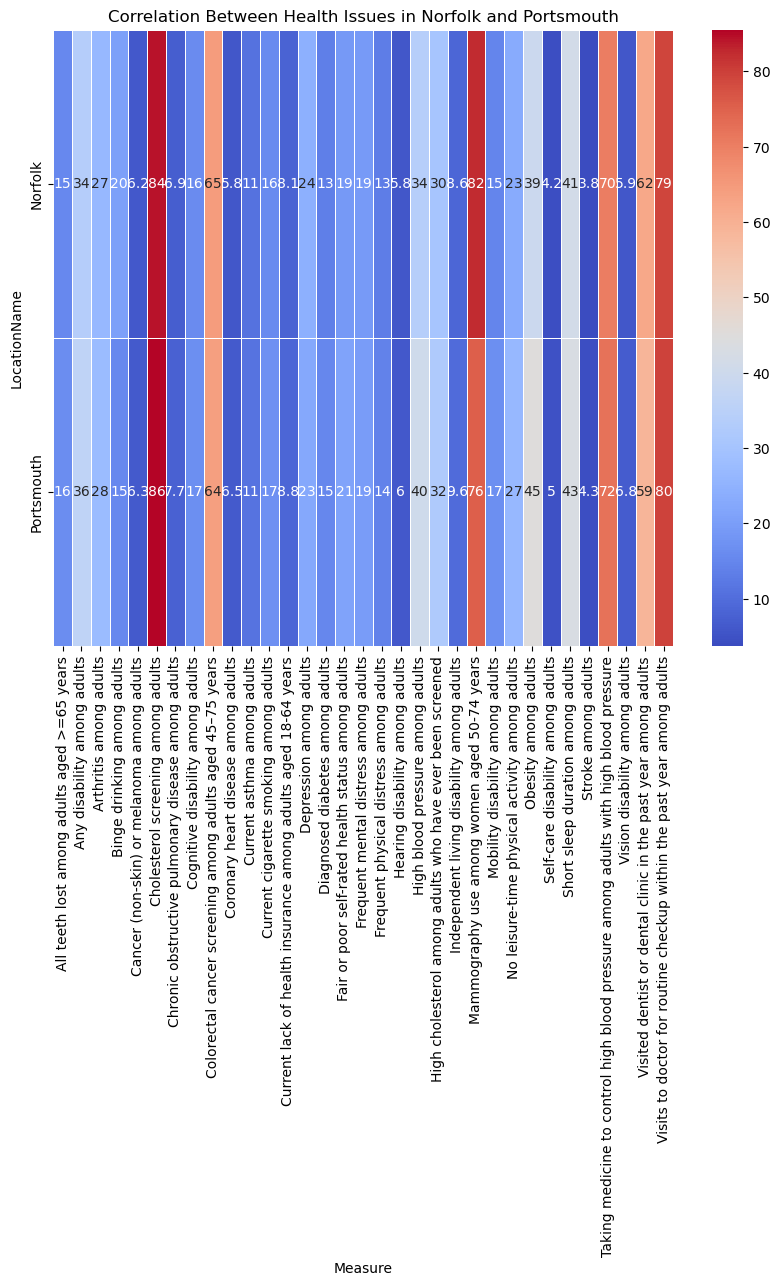

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Health Issues in Norfolk and Portsmouth')
plt.show()